<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/cats_vs_dogs_classification(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

## Import the dataset from kaggel

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
# The file is in zip file to unzio
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',

    # Batch size
    batch_size=32,

    # For reshaing the images
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',

    # Batch size
    batch_size=32,

    # For reshaing the images
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## Normalize the data

In [19]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


# Applying the function
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Creating CNN Model

In [20]:
model = Sequential()
    
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
# Fitting the model
hisstory =  model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 90ms/step - loss: 0.6301 - accuracy: 0.6431 - val_loss: 0.5558 - val_accuracy: 0.6980
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4979 - accuracy: 0.7531 - val_loss: 0.4602 - val_accuracy: 0.7802
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.3883 - accuracy: 0.8215 - val_loss: 0.4382 - val_accuracy: 0.8074
Epoch 4/10
625/625 [==============================] - 56s 90ms/step - loss: 0.2599 - accuracy: 0.8892 - val_loss: 0.5712 - val_accuracy: 0.7822
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1466 - accuracy: 0.9441 - val_loss: 0.8619 - val_accuracy: 0.7702
Epoch 6/10
625/625 [==============================] - 56s 90ms/step - loss: 0.0966 - accuracy: 0.9640 - val_loss: 1.0797 - val_accuracy: 0.7736
Epoch 7/10
625/625 [==============================] - 59s 94ms/step - loss: 0.0589 - accuracy: 0.9802 - val_loss: 1.0160 - val_accuracy:

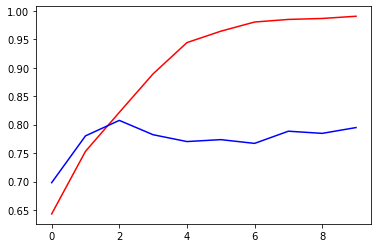

In [24]:
import matplotlib.pyplot as plt

plt.plot(hisstory.history['accuracy'],color ='red',label ='train')
plt.plot(hisstory.history['val_accuracy'],color ='blue',label ='validation')

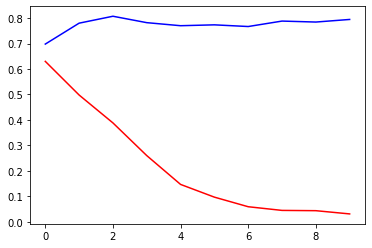

In [25]:
plt.plot(hisstory.history['loss'],color ='red',label ='loss')
plt.plot(hisstory.history['val_accuracy'],color ='blue',label ='validation')

# **ways to reduce overfitting**

1. Add more data
2. Data Augmentation
3. L1/L2 Regularizer
4. Dropout
5. Batch Norm
6. Reduce complexity

## Using Batch Normalization and using Dropouts

In [26]:
model = Sequential()
    
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation ='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))



In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
# Fitting the model
hisstory =  model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 117ms/step - loss: 1.1910 - accuracy: 0.6116 - val_loss: 0.6275 - val_accuracy: 0.6402
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5454 - accuracy: 0.7236 - val_loss: 0.5367 - val_accuracy: 0.7170
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4625 - accuracy: 0.7815 - val_loss: 0.6946 - val_accuracy: 0.6596
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4063 - accuracy: 0.8168 - val_loss: 0.4809 - val_accuracy: 0.7638
Epoch 5/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3465 - accuracy: 0.8513 - val_loss: 0.4807 - val_accuracy: 0.7712
Epoch 6/10
625/625 [==============================] - 71s 112ms/step - loss: 0.2604 - accuracy: 0.8914 - val_loss: 0.4954 - val_accuracy: 0.7814
Epoch 7/10
625/625 [==============================] - 71s 113ms/step - loss: 0.1868 - accuracy: 0.9269 - val_loss: 0.6154 - val_ac

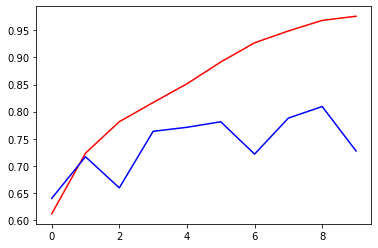

In [30]:
import matplotlib.pyplot as plt

plt.plot(hisstory.history['accuracy'],color ='red',label ='train')
plt.plot(hisstory.history['val_accuracy'],color ='blue',label ='validation')

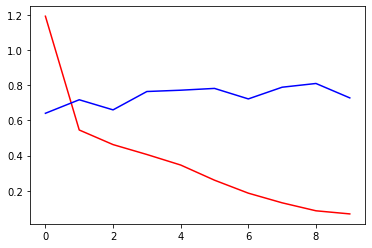

In [31]:
plt.plot(hisstory.history['loss'],color ='red',label ='loss')
plt.plot(hisstory.history['val_accuracy'],color ='blue',label ='validation')

## predictation

In [32]:
import cv2

In [33]:
# Import the new image
image = cv2.imread('/content/photo-1611003228941-98852ba62227.jpg')

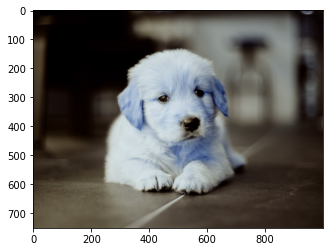

In [34]:
plt.imshow(image)

In [35]:
image.shape

(750, 1000, 3)

In [37]:
# Reshape the image
image_reshape = cv2.resize(image,(256,256))

In [38]:
image_reshape.shape

(256, 256, 3)

In [39]:
test_input = image_reshape.reshape(1,256,256,3)

In [40]:
# Model prediction
model.predict(test_input)

1/1 [==============================] - 0s 251ms/step


array([[1.]], dtype=float32)